iris dataset

iris_feature_names

Sepal Length : 꽃 받침 길이 Sepal Width : 꽃 받침 너비 Petal Length : 꽃잎 길이 Petal Width : 꽃잎 너비

꽃받침 길이, 너비 두가지 feature를 가지고 Decision Tree 알고리즘을 이용하여 꽃의 종류 분류

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
iris.data.shape

(150, 4)

In [6]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

train, test split & accuracy check

test_size=0.3의 의미
전체 데이터 중 30%는 테스트용 데이터, 70%는 학습용 데이터로 쓰겠다는 의미입니다.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [9]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((105, 4), (45, 4), (45,), (105,))

In [11]:
tree.DecisionTreeClassifier?

Init signature:
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [15]:
accuracy_score(y_test, y_pred)

0.9111111111111111

91퍼센트 일치

In [16]:
import matplotlib.pyplot as plt

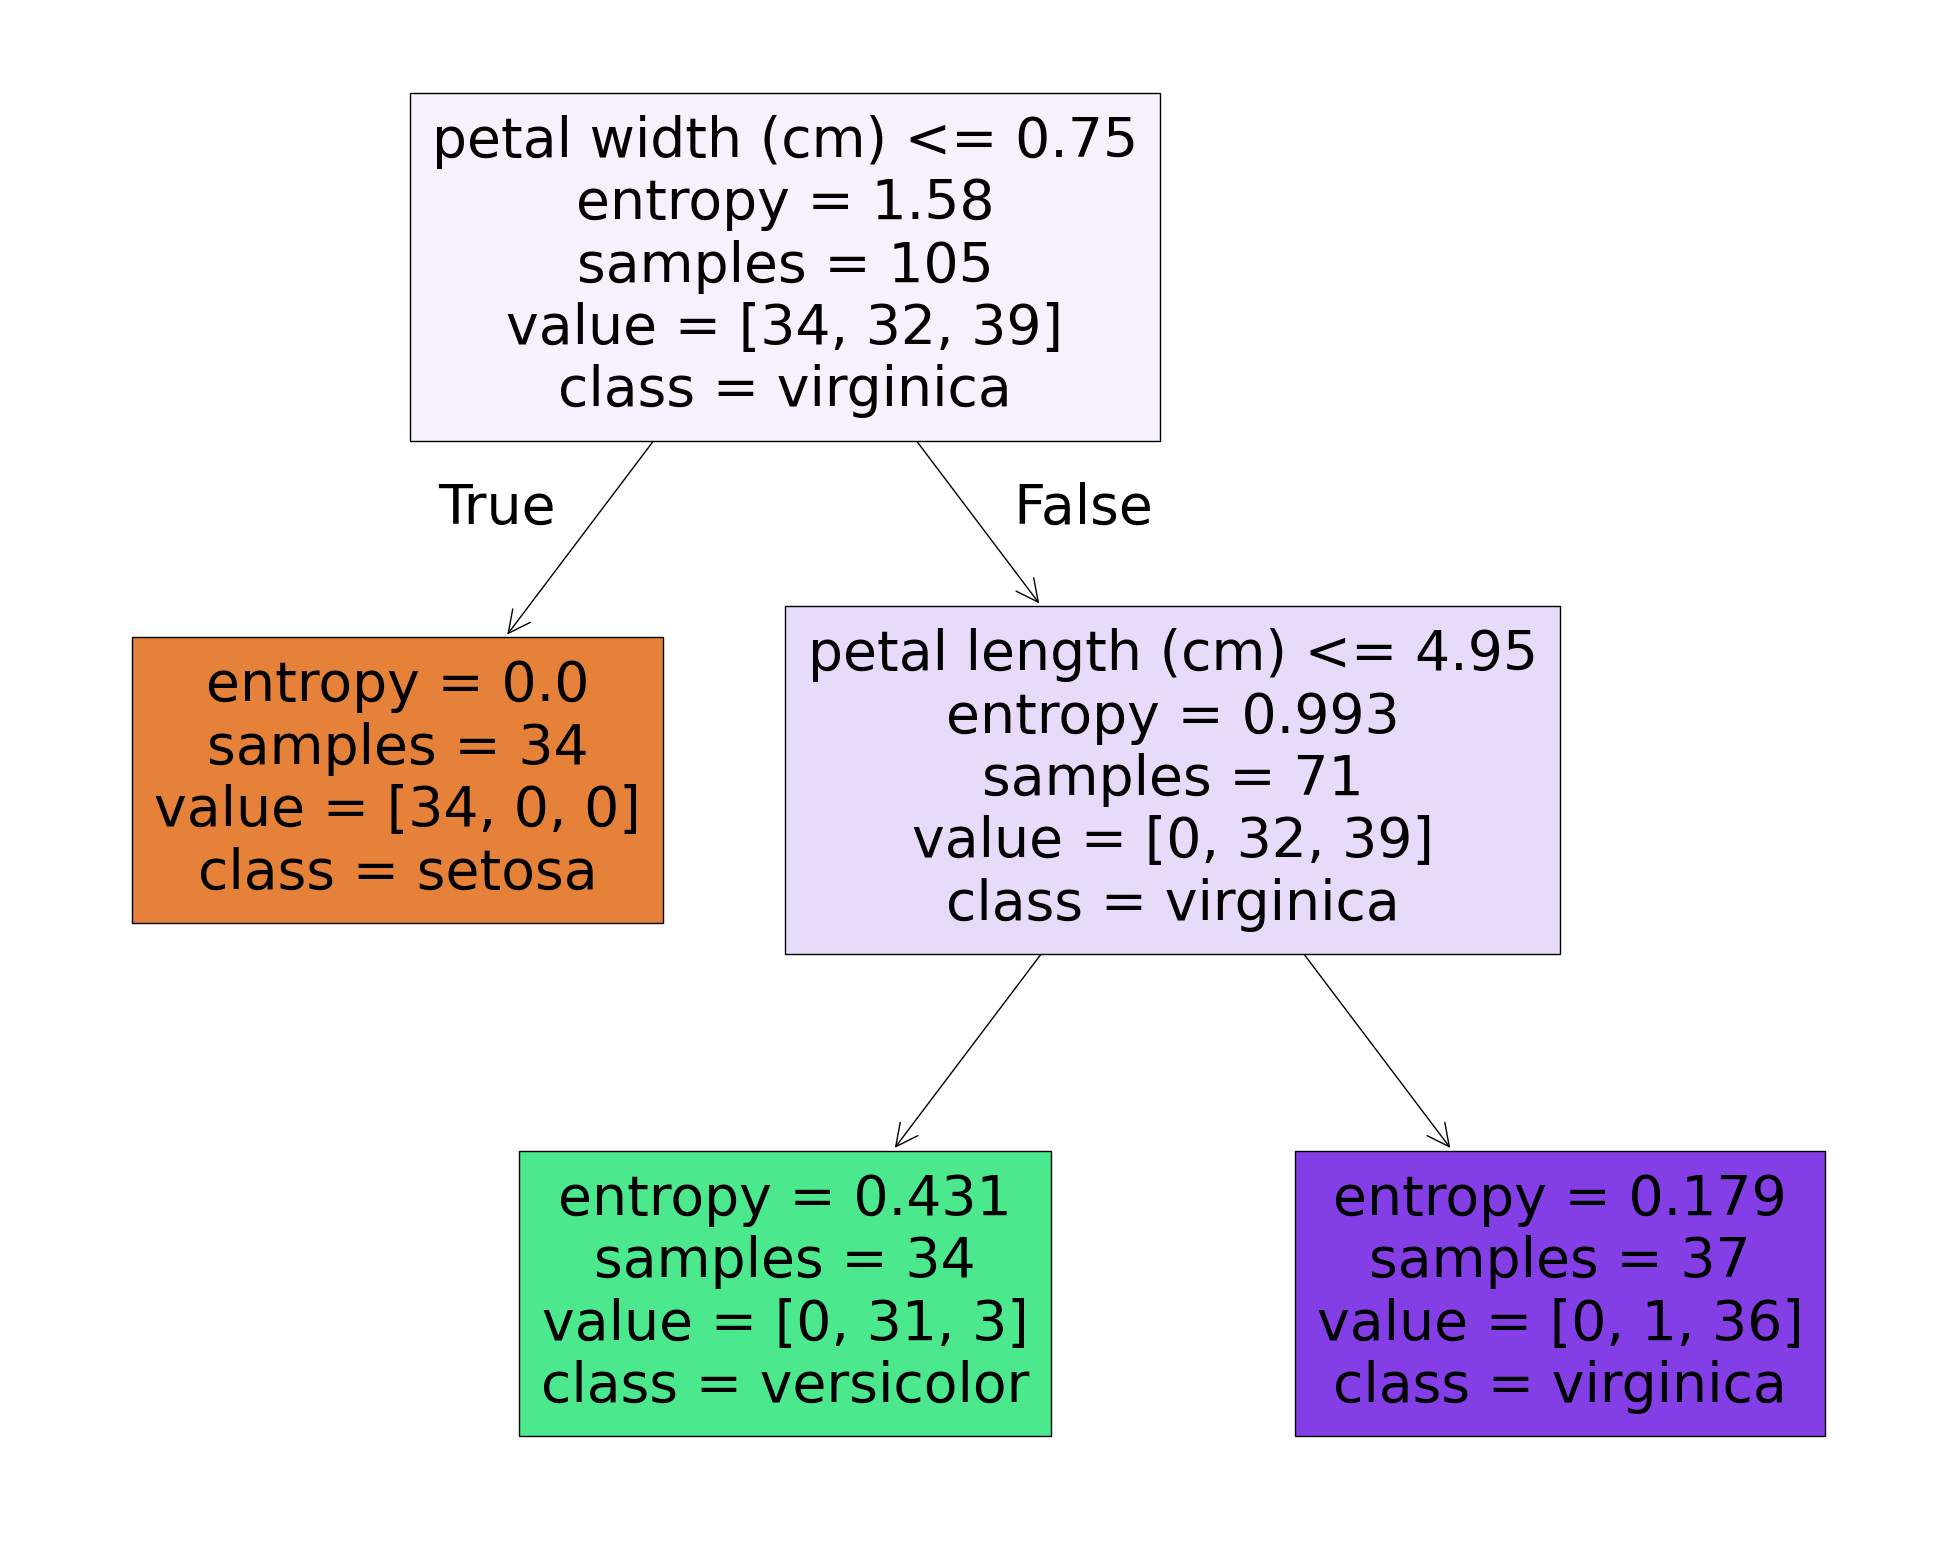

In [19]:
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)